## K-Means Clustering:
* K-mean clustering is a type of unsupervised learning algorithm.
* It works on unlabeled data.
* It make clusters from unlabeled data.

## Example:

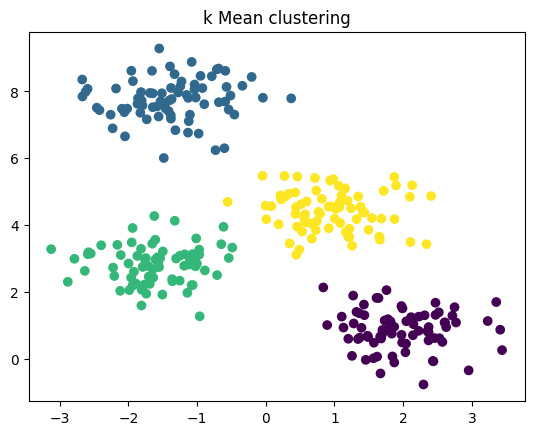

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# generate sample data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# initate a KMeans object with the number of clusters
kmeans= KMeans(n_clusters= 4)
# fit the data to the KMeans algorithm
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels= kmeans.labels_

# plot the data points with difference clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('k Mean clustering')
plt.show()

## Let's practice on diamond dataset

Text(0, 0.5, 'Carat')

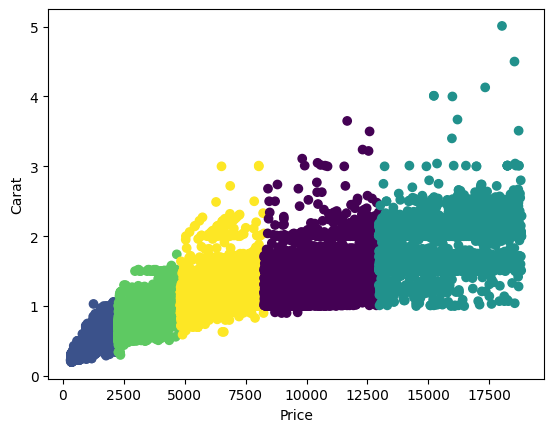

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df= sns.load_dataset('diamonds')

X= df[['price', 'carat']]

kmeans= KMeans(n_clusters=5)
kmeans.fit(X)
# Get the predicted cluster labels as a new column to the original dataset
labels= kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
df['labels']= labels

# Plots the data point with different colors for difference clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel('Price')
plt.ylabel('Carat')

In [ ]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       1
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       1
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       1
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       1
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       1

In [14]:
df.labels.unique()

array([1, 3, 4, 0, 2], dtype=int32)

<Axes: xlabel='labels', ylabel='price'>

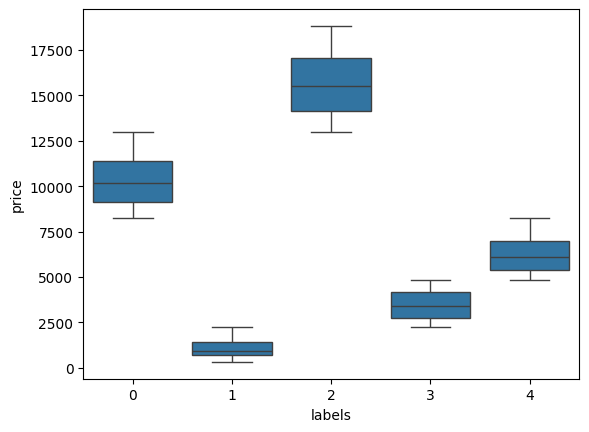

In [17]:
sns.boxplot(x='labels', y='price', data=df)

# Let's change the number of clusters

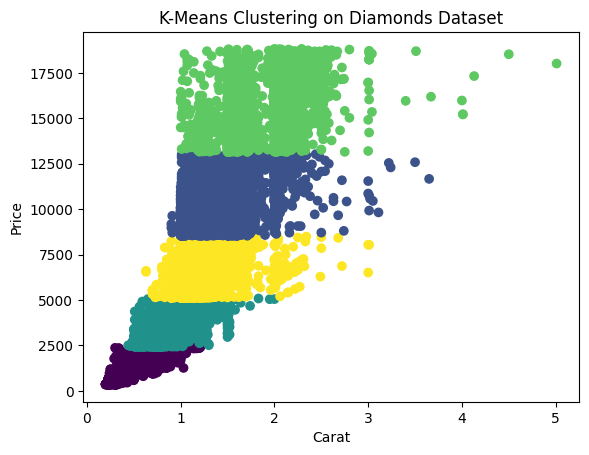

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

diamonds= sns.load_dataset('diamonds')
# Select relevent columns
X= diamonds[['carat', 'price', 'cut', 'color', 'clarity']]

# Convert categorical variables to numerical using one-hot encoding
X= pd.get_dummies(X)

# Instructions a KMeans object with the number of clusters
kmeans= KMeans(n_clusters=5)

# Fit the data to the kmeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels= kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels']= labels

# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('K-Means Clustering on Diamonds Dataset')
plt.show()


## Can we plot categorical data? with numerical?

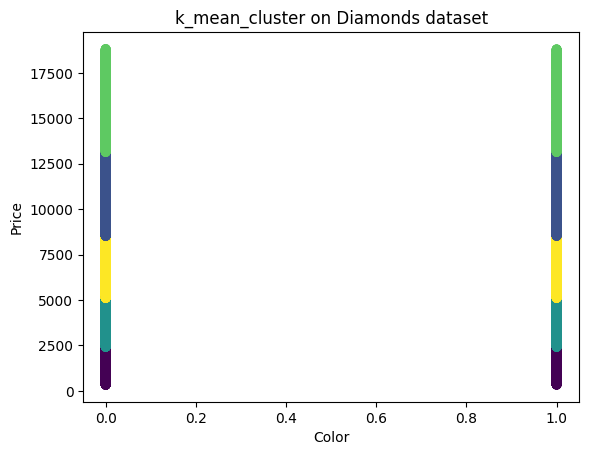

In [20]:
# Plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 2], X.iloc[:, 1], c=labels)
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('k_mean_cluster on Diamonds dataset')
plt.show()

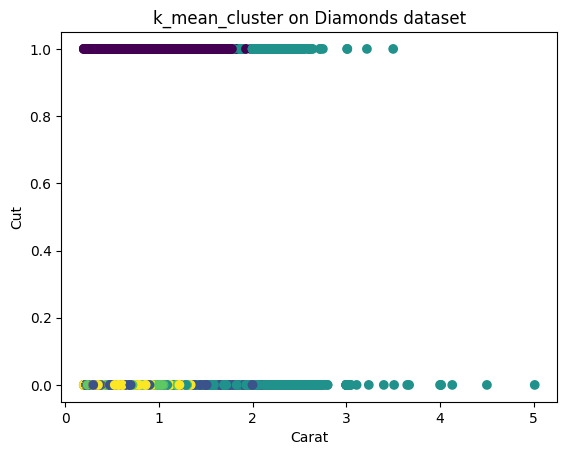

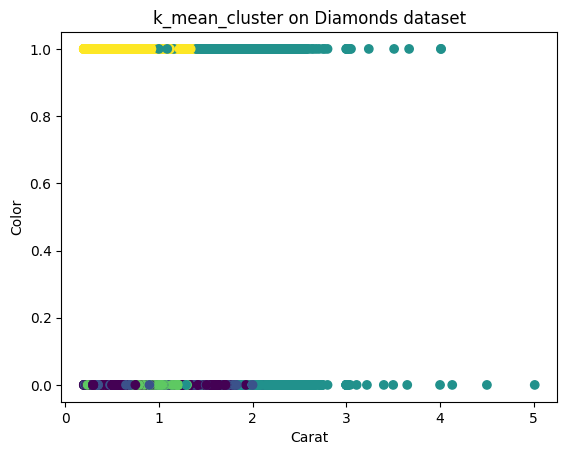

In [21]:
# Select relevant columns
X= diamonds[['carat', 'cut', 'color']]

# Convert categorical variables to numerical using one-hot encoding
X= pd.get_dummies(X)

# Instantiate a KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels= kmeans.labels_

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels']= labels

# plot the data points with different colors for different clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel('Carat')
plt.ylabel('Cut')
plt.title('k_mean_cluster on Diamonds dataset')
plt.show()

plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=labels, cmap='viridis')
plt.xlabel('Carat')
plt.ylabel('Color')
plt.title('k_mean_cluster on Diamonds dataset')
plt.show()

## Adding cluster 

In [22]:
# Select relevant columns
X= diamonds[['carat', 'price']]

# Instantiate a KMeans object with the number of clusters 
kmeans= KMeans(n_clusters=5)

# Fit the data to the KMeans algorithm
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels= kmeans.predict(X)

# Add predicted cluster labels as a new column to the original dataset
diamonds['labels']= labels

# Display the first few rows of the dataset with the new column added
print(diamonds.head())

# Display the unique values of a label
print('These are the unique values of the labels:', sorted(diamonds.labels.unique()))

   carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       3
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       3
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       3
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       3
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       3
These are the unique values of the labels: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)]


## Make a parallel coordinate plot using plotly: 

In [23]:
import plotly.express as px
fig= px.parallel_coordinates(diamonds, color='labels')
fig.show()

## Model Evaluation:

### 1. Elbow Method: 

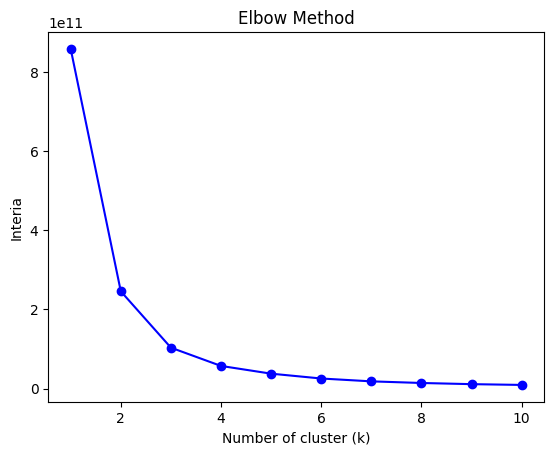

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Diamonds Dataset
df= sns.load_dataset('diamonds')

# Select relevant features for clustering
features= ['carat', 'depth', 'price']

# Extract the selected features from the datasets
X= df[features]

# Perform K-Means clustering for different values of k
k_values= range(1, 11) # Test k from 1 to 10
inertias= []

for k in k_values:
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Interia')
plt.title('Elbow Method')
plt.show()
